In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("data.csv")
data.drop(['id','Unnamed: 32'],axis=1, inplace=True)

In [4]:
my_data=data.loc[:,'diagnosis':'texture_mean']



In [5]:
label=[]
y=np.array([])
for i in range(len(my_data)):
    if my_data.loc[i,'diagnosis']=="M":
        label.append("red")
        y=np.append(y,1)
    else:
        label.append("blue")
        y=np.append(y,0)



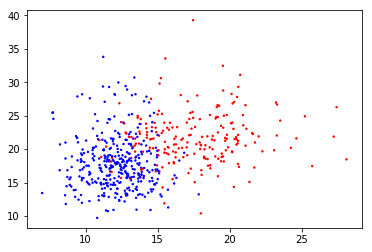

In [6]:
plt.scatter(my_data['radius_mean'],my_data['texture_mean'],c=label,s=2)
plt.show()

In [7]:
import math
def sigmoid(z):
    sig=1/(1+math.exp(-z))
    return sig

In [8]:
teta=np.array([.1,.1,.1])

y[102]

0.0

In [9]:
x=my_data.loc[0:99,'radius_mean':'texture_mean'].values

x=np.concatenate((np.ones((100,1)),x),axis=1)
np.matmul(teta.T,x[0])


2.9370000000000003

In [10]:
def cost(x,y,teta):
    m=len(y)
    cost_value=0
    for i in range(m):
        h_teta=sigmoid(np.matmul(teta.T,x[i]))
        cost_iter=y[i]*(np.log(h_teta))+(1-y[i])*((np.log(1-h_teta)))
        cost_value=cost_value+ cost_iter
    return (-1/m)*cost_value

In [11]:
cost(x,y[0:100],teta)


1.0804582400877487

In [12]:
def calculate_weight1(x,y,teta,rate):
    
    m=len(y)
    
    sum_error1=np.zeros((1,3))
   
    for i in range(m):
        h_teta=sigmoid(np.matmul(teta.T,x[i]))
        sum_error1=sum_error1+((h_teta-y[i])*x[i])
    return teta-rate*sum_error1


In [13]:
def calculate_weight(x,y,teta,rate):
    
    m=len(y)
    
    sum_error1=np.zeros((1,3))
   
    for i in range(m):
        
        h_teta=sigmoid(np.matmul(teta.T,x[i]))
        
        sum_error1=sum_error1+((h_teta-y[i])*x[i])
    return teta-rate*sum_error1[0]

In [14]:
teta=calculate_weight(x,y[0:100],teta,rate=0.001)


In [15]:
x.shape

(100, 3)

In [16]:
for i in range(10000):
    teta=calculate_weight(x,y[0:100],teta,rate=0.001)
    #cost(x,y[0:100],teta[0])

In [17]:
cost(x,y[0:100],teta)

0.4289929487208388

In [18]:
1.939/.732

    

2.648907103825137

In [19]:
def my_plot(teta):
    x=np.linspace(10,20,300)
    y=(-teta[0]/teta[2])+(-teta[1]/teta[2])*x
    plt.plot(x,y)

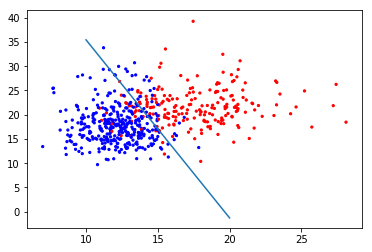

In [20]:
my_plot(teta)

plt.scatter(my_data['radius_mean'],my_data['texture_mean'],c=label,s=5)